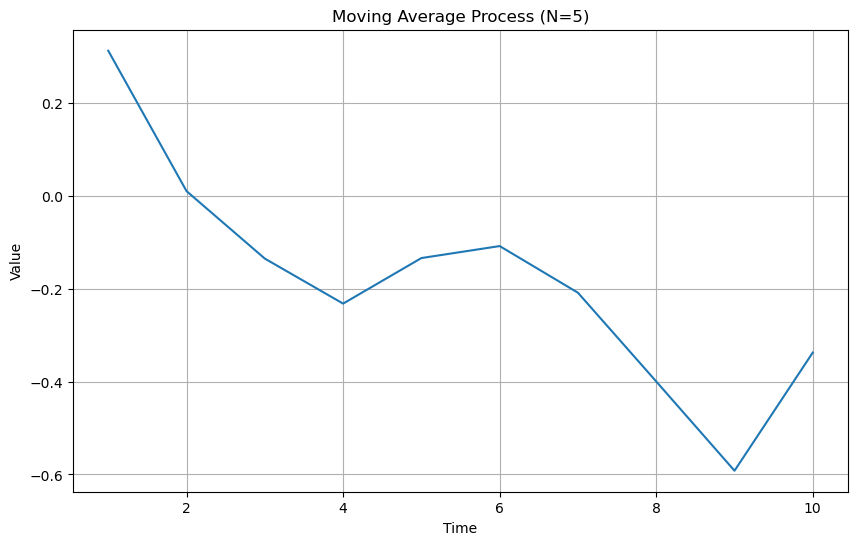

In [37]:
import numpy as np 
import matplotlib.pyplot as plt

def sampleMovingAverageProcess(mean, variance, length, N):
    # White Gaussian Noise
    Xn = np.random.normal(mean, np.sqrt(variance), size=length+N)
    
    Yn = np.zeros(length)  # allocate output
    
    for t in range(length):
        Yn[t] = (1/N) * np.sum(Xn[t:t+N-1])
        
    return Yn

# Example run
Yn = sampleMovingAverageProcess(0, 1, 10, 5)
plt.figure(figsize = (10,6))
plt.plot(np.arange(1, 11), Yn)
plt.title("Moving Average Process (N=5)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()


In [38]:
Ymatrix = np.zeros((10_000,10))

In [41]:
for i in range(10_000):
    Ymatrix[i] = sampleMovingAverageProcess(0, 1, 10, 5)
meanEstimates = np.zeros(10)
for i in range(10):
    meanEstimates[i] = np.mean(Ymatrix[:,i])

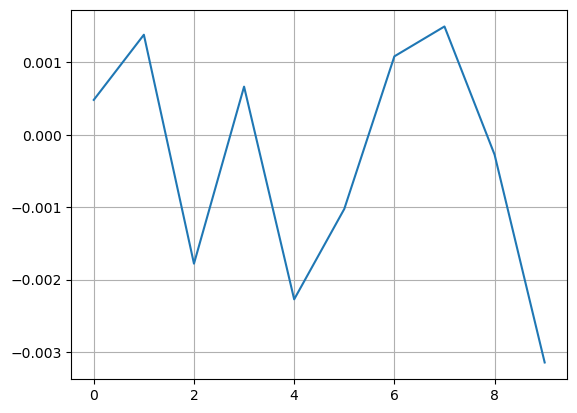

In [43]:
plt.plot(meanEstimates)
plt.grid(True)

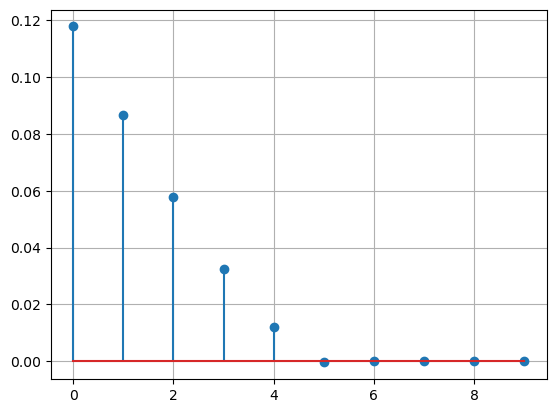

In [63]:
def covariance_est(Ymatrix, delta):
    n1 = np.arange(1, 11-delta)
    n2 = n1 + delta
    vals = []
    for i in range(M):
        vals.extend(Ymatrix[i, n1-1] * Ymatrix[i, n2-1])
    return np.mean(vals)

deltas = range(0, 10)
cov_est = [covariance_est(Ymatrix, d) for d in deltas]
plt.stem(range(10),cov_est)
plt.grid(True)
plt.show()

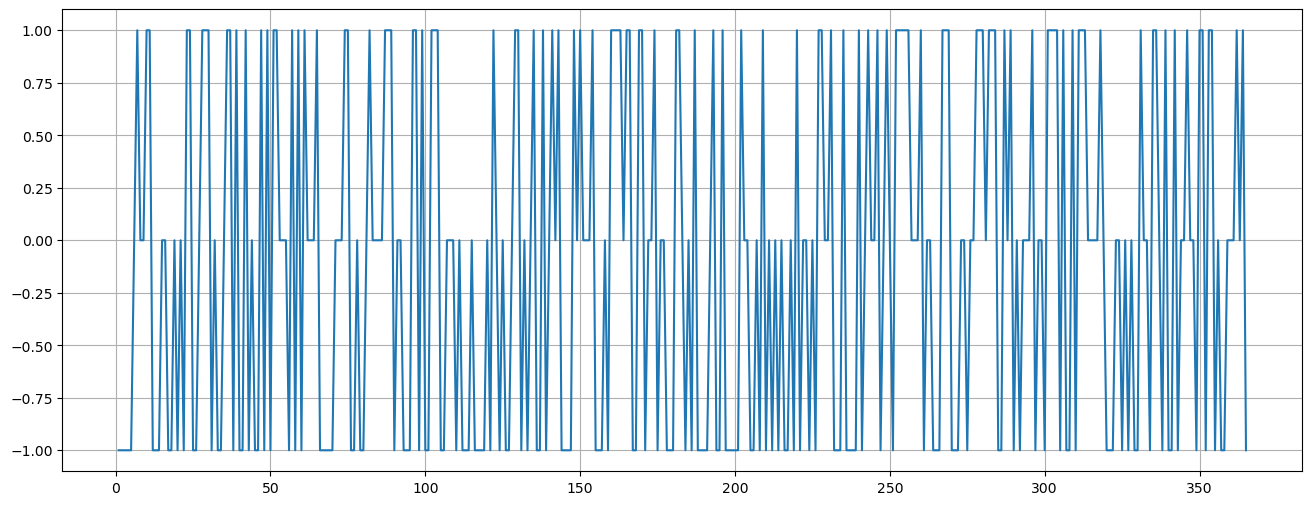

In [77]:
# 1. Weather prediction model

initialState = np.array([1,0,0])
states = [-1,0,1]
P = np.array([[0.7, 0.2, 0.1],
              [0.3, 0.4, 0.3],
              [0.2, 0.3, 0.5]])

days = 365

def samplePath(initalState , states , P,days):
    statesArray = np.zeros(days)
    currentState = initialState.copy()
    for i in range(1,days+1):
        choice = np.random.choice(states,p=currentState)
        statesArray[i-1] = choice
        currentState = currentState @ P
    return statesArray

samplePathone = samplePath(initialState , states , P , days)
plt.figure(figsize = (16,6))
plt.plot(range(1,366), samplePathone)
plt.grid(True)
plt.show()


In [80]:
def empiricalLongTermDistr(initialState , states , P ):
    currentState = [1,0,0]
    for i in range(24):
        currentState = currentState @ P
    # now we have the vector of prob of states after 25 days
    sampleLastDays = [np.random.choice(states , p = currentState) for i in range(1_000_000)]
    sunnyDays = [1 if sampleLastDays[i]==-1 else 0 for i in range(len(sampleLastDays))]
    cloudyDays = [1 if sampleLastDays[i]==0 else 0 for i in range(len(sampleLastDays))]
    rainyDays = [1 if sampleLastDays[i]==1 else 0 for i in range(len(sampleLastDays))]
    sunnyProb = np.mean(sunnyDays)
    cloudyProb = np.mean(cloudyDays)
    rainyProb = np.mean(rainyDays)
    return sunnyProb , cloudyProb , rainyProb

sunny , cloudy , rainy = empiricalLongTermDistr(initialState, states , P)
print("Rainy:", rainy, "Cloudy:", cloudy, "Sunny:", sunny)

Rainy: 0.261147 Cloudy: 0.283319 Sunny: 0.455534
